<a href="https://colab.research.google.com/github/duytan118/AI/blob/BTVN/fingerprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [10]:
%cd /content/drive/MyDrive/Colab Notebooks/BTVN/fingerprint/dataset/


/content/drive/MyDrive/Colab Notebooks/BTVN/fingerprint/dataset


In [11]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [28]:
training_set=train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/fingerprint/dataset/train',target_size=(160,160), batch_size=32, class_mode='categorical')

Found 357 images belonging to 7 classes.


In [29]:
validation=train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/fingerprint/dataset/validation',target_size=(160,160), batch_size=32, class_mode='categorical')

Found 203 images belonging to 7 classes.


In [30]:
training_set.class_indices

{'AS': 0, 'RL': 1, 'UL': 2, 'WD': 3, 'WE': 4, 'WI': 5, 'WS': 6}

In [31]:
validation.class_indices

{'AS': 0, 'RL': 1, 'UL': 2, 'WD': 3, 'WE': 4, 'WI': 5, 'WS': 6}

In [39]:
model = Sequential()
#Convolutional
model.add(Conv2D(64, kernel_size= (3,3), activation= 'linear', input_shape= (160,160,3), padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))
model.add(Conv2D(128, (3,3), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))
model.add(Conv2D(256, (3,3), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 1))
model.add(MaxPooling2D((2,2), padding= 'same'))

#ANN
model.add(Flatten())
model.add(Dense(256, activation= 'linear'))
model.add(LeakyReLU(alpha= 0.1))
model.add(Dense(7, activation= 'softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 160, 160, 64)      1792      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 160, 160, 64)      0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 80, 80, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 80, 80, 128)       73856     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 80, 80, 128)       0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 40, 40, 128)      0         
 g2D)                                                 

In [40]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=50,batch_size=32,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/50
12/12 [==============================] - 7s 398ms/step - loss: 10.4957 - accuracy: 0.1401 - val_loss: 2.3612 - val_accuracy: 0.1429
Epoch 2/50
12/12 [==============================] - 4s 377ms/step - loss: 2.0708 - accuracy: 0.1765 - val_loss: 2.0084 - val_accuracy: 0.1675
Epoch 3/50
12/12 [==============================] - 5s 388ms/step - loss: 1.9572 - accuracy: 0.1765 - val_loss: 1.9158 - val_accuracy: 0.2020
Epoch 4/50
12/12 [==============================] - 4s 344ms/step - loss: 1.9248 - accuracy: 0.1905 - val_loss: 1.8754 - val_accuracy: 0.2808
Epoch 5/50
12/12 [==============================] - 5s 470ms/step - loss: 1.9629 - accuracy: 0.1821 - val_loss: 1.9110 - val_accuracy: 0.1478
Epoch 6/50
12/12 [==============================] - 4s 344ms/step - loss: 1.8854 - accuracy: 0.1597 - val_loss: 1.8375 - val_accuracy: 0.1872
Epoch 7/50
12/12 [==============================] - 5s 442ms/step - loss: 2.0397 - accuracy: 0.1653 - val_loss: 1.9954 - val_accuracy: 0.2562
Epoch

In [41]:
# Lưu 
model.save("fingerprint.h5")
model_1=load_model('fingerprint.h5')

In [42]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.08138279616832733
Train Accuracy 0.9747899174690247


<function matplotlib.pyplot.show(close=None, block=None)>

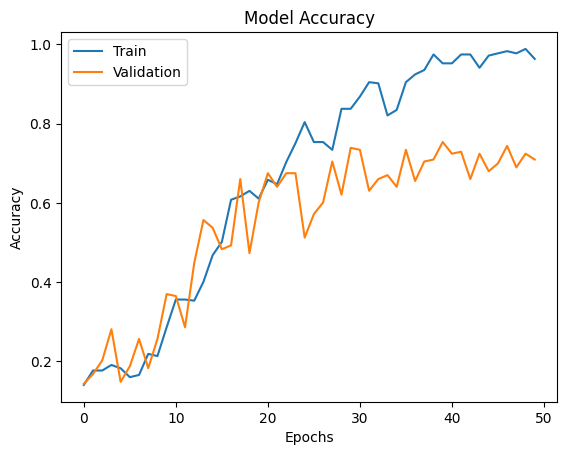

In [43]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

1/1 [==============================] - 0s 232ms/step
Chủng Ulnar Loop: Không giỏi sáng tạo nhưng học hỏi rất nhanh. Thích ứng nhanh, sống tình cảm và kỷ luật


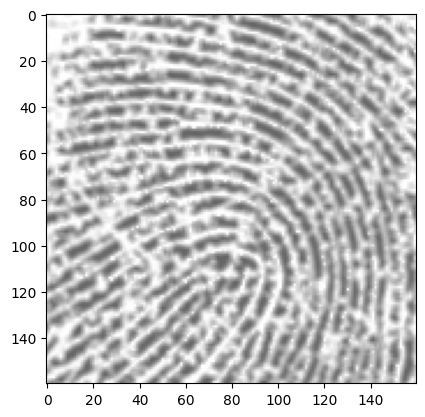

1/1 [==============================] - 0s 23ms/step
Chủng Simple Arch: Tiềm năng lớn, khả năng hấp thu gần như vô hạn. Nếu nỗ lực và phát triển đúng cách sẽ phát huy hiệu quả tối ưu và ngược lại. Thường khởi đầu khá chậm 


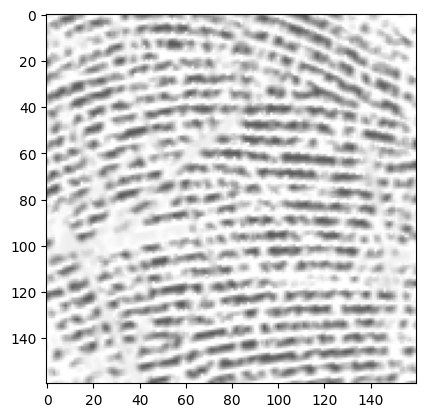

1/1 [==============================] - 0s 18ms/step
Chủng Radial Loop: Hòa đồng, thân thiện và rất nhạy bén với mọi việc. Tư duy độc đáo, sáng tạo. Tuy nhiên, dễ bị kích động về mặt cảm xúc


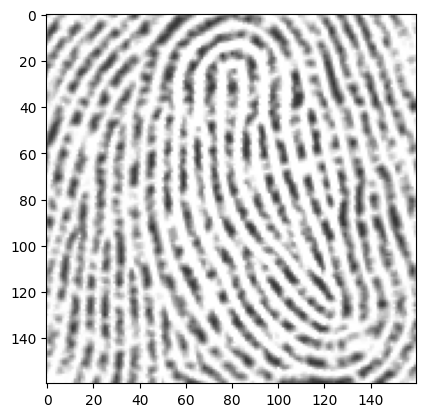

1/1 [==============================] - 0s 30ms/step
Chủng Composite Whorl: Suy nghĩ quá nhiều, do dự trong việc ra quyết định. được mọi người khen ngợi và tôn trọng. Nóng tính nhưng kiểm soát được


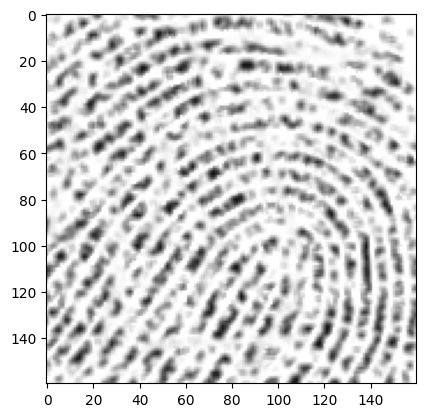

1/1 [==============================] - 0s 20ms/step
Chủng Spriral Whorl: Có tính tự lập, có khả năng chỉ đạo, tính kỷ luật tốt, luôn cố gắnggắng. Thẳng thắn, nóng tính


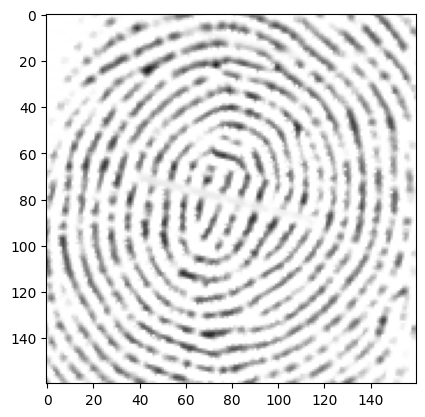

1/1 [==============================] - 0s 20ms/step
Chủng Elongated Whorl: Có cái tôi cao, kiên trì, tỉ mỉ, kỷ luật. Thẳng thắn, nóng tính đôi khi không kiểm soát được


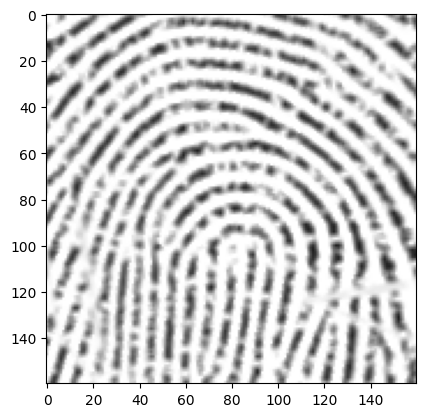

1/1 [==============================] - 0s 27ms/step
Chủng Radial Loop: Hòa đồng, thân thiện và rất nhạy bén với mọi việc. Tư duy độc đáo, sáng tạo. Tuy nhiên, dễ bị kích động về mặt cảm xúc


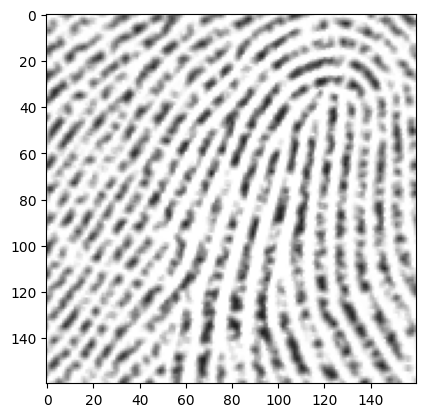

In [45]:
test="/content/drive/MyDrive/Colab Notebooks/BTVN/fingerprint/dataset/real_data"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(160,160))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Chủng Simple Arch: Tiềm năng lớn, khả năng hấp thu gần như vô hạn. Nếu nỗ lực và phát triển đúng cách sẽ phát huy hiệu quả tối ưu và ngược lại. Thường khởi đầu khá chậm '
  ,'Chủng Radial Loop: Hòa đồng, thân thiện và rất nhạy bén với mọi việc. Tư duy độc đáo, sáng tạo. Tuy nhiên, dễ bị kích động về mặt cảm xúc'
              ,'Chủng Ulnar Loop: Không giỏi sáng tạo nhưng học hỏi rất nhanh. Thích ứng nhanh, sống tình cảm và kỷ luật'
              ,'Chủng Composite Whorl: Suy nghĩ quá nhiều, do dự trong việc ra quyết định. được mọi người khen ngợi và tôn trọng. Nóng tính nhưng kiểm soát được'
              ,'Chủng Elongated Whorl: Có cái tôi cao, kiên trì, tỉ mỉ, kỷ luật. Thẳng thắn, nóng tính đôi khi không kiểm soát được'
              ,'Chủng Imploding Whorl: Suy nghĩ quá nhiều, do dự trong việc ra quyết định. được mọi người khen ngợi và tôn trọng. Nóng tính nhưng kiểm soát được, tiêu chuẩn cao, bảo thủ và có trách nhiệm'
              ,'Chủng Spriral Whorl: Có tính tự lập, có khả năng chỉ đạo, tính kỷ luật tốt, luôn cố gắnggắng. Thẳng thắn, nóng tính']
  print(class_name[result])
  plt.show()